In [2]:
# importing iris dataset
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['class'] = iris.target
x = df.drop(labels='class', axis=1).astype(np.float32).values
y = df['class'].astype(np.float32).values

In [3]:
# importing Pytorch libraries
import torch, torch.nn as nn

In [4]:
# converting x and y to tensors and then to required data types
data = torch.tensor(x).float()
labels = torch.tensor(y).long()

print(data.size())
print(labels.size())

torch.Size([150, 4])
torch.Size([150])


In [5]:
# Defining a simple neural network with ReLu activations
model = nn.Sequential(nn.Linear(4,16), nn.ReLU(),nn.Linear(16,16), nn.ReLU(), nn.Linear(16,3))

In [6]:
# Defining loss function and optimizer
crossentropyloss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr =.01)

In [7]:
maxiter = 1000
losses = []
accuracy = []
for epoch in range(maxiter):
    preds = model(data)
    loss = crossentropyloss(preds, labels)
    losses.append(loss.detach())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    matches = (torch.argmax(preds, axis=1) == labels).float()
    accuracyPct = 100*torch.mean(matches)
    accuracy.append(accuracyPct)

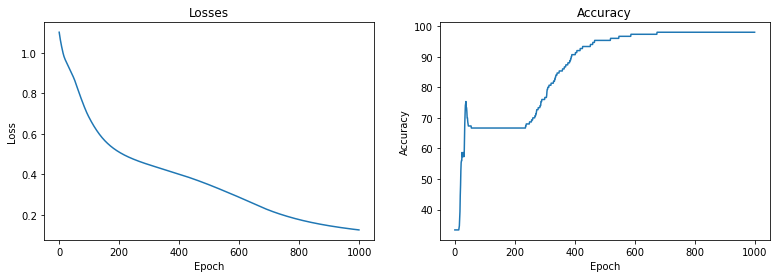

In [8]:
# Assume the loss have sufficiently reduced and accuracies be consistent after 1000 epochs

# Plotting accuracy against epoch
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(13,4))

ax[0].plot(losses)
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_title('Losses')

ax[1].plot(accuracy)
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy')
plt.show()

In [ ]:
# The above graphs shows reduction in losses and growth of accuracy over the epochs

In [9]:
# Finding the predictions for the final model and comparing with the original values
predictions = model(data)
predlabels = torch.argmax(predictions, axis=1)
final_accuracy = 100*torch.mean((predlabels == labels).float())
final_accuracy

tensor(98.)

## Trying to reveal more insight about how ANNs create boundaries

In [11]:
from matplotlib.colors import ListedColormap

x = df.drop(labels='class', axis=1).astype(np.float32).values
y = df['class'].astype(np.float32).values
data = torch.tensor( x[:,1:3] ).float()
labels = torch.tensor( y ).long()

In [12]:
# creating the model
model = nn.Sequential(nn.Linear(2, 128),   #input layer
                      nn.ReLU(),           #activation function
                      nn.Linear(128, 128), #hidden layer
                      nn.Sigmoid(),        #activation function
                      nn.Linear(128,3)     #output layer
                     )

In [13]:
#training the model
optimizer = torch.optim.SGD(model.parameters(), lr=.01)

for epoch in range(maxiter):
    preds = model(data)
    loss = crossentropyloss(preds, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

### preparing a 2D space for plotting a contour plot to show decision boundaries

/tmp/ipykernel_30760/1338625742.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y == cl, 1], y=x[y == cl, 2], c=colors[idx],


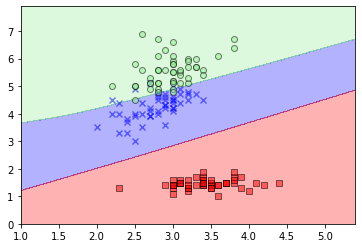

In [17]:
x1_min, x1_max = x[:, 1].min() - 1, x[:, 1].max()+1
x2_min, x2_max = x[:, 2].min() - 1, x[:, 2].max()+ 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))

predictions = model(torch.tensor(np.array([xx1.ravel(), xx2.ravel()]).astype(np.float32)).T)
predlabels = torch.argmax(predictions, axis=1)

markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])

Z = predlabels.T
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=x[y == cl, 1], y=x[y == cl, 2], c=colors[idx],
               marker=markers[idx], alpha=0.5, label=cl, edgecolor='black')

* The decicions boundaries might not be straight, and with more complex data, they might be even more complex